## First, install the package

Run ```pip install -e .``` at the proj root directory

## Pretrain the model on serveral datasets under inductive setting. 
```
bash scripts/run_small_dataset.sh $GPU_NUMBER
```

GPU_NUMBER is the index of GPU to use. For example, ```bash scripts/run_small_dataset.sh 3``` means using GPU 3 to train the models.


## Perform the edit on pretrained model.

```
bash scripts/eval.sh $GPU_NUMBER
```

## Load saved results for visualization

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import numpy as np
import os

font_config = {'font.size': 14, 'font.family': 'Times New Roman'}
plt.rcParams.update(font_config)
plt.rcParams["figure.figsize"] = (6.4, 3.2)

datasets = ['cora', 'flickr', 'reddit2', 'arxiv']
models = ['GCN', 'SAGE', 'MLP']
criterion = 'wrong2correct'
ROOT = '/home/grads/z/zhimengj/Code/edit_gnn/finetune'

summary = {}
for dataset in datasets:
    summary[dataset] = {}
    for model in models:
        file_name = f'{ROOT}/{dataset}/{model}_{criterion}_eval.json'
        with open(file_name, 'r') as f:
            summary[dataset][model] = json.load(f)
# print(summary)

In [10]:
fig = plt.figure()
num_datasets = len(datasets)

edit_way = 'ind_edit'
metric = 'val_drawdown'

gathered_data = []
for idx, model in enumerate(models):    
    data = [summary[dataset][model][edit_way][metric] for dataset in datasets]
    gathered_data.append(data)


<Figure size 460.8x230.4 with 0 Axes>

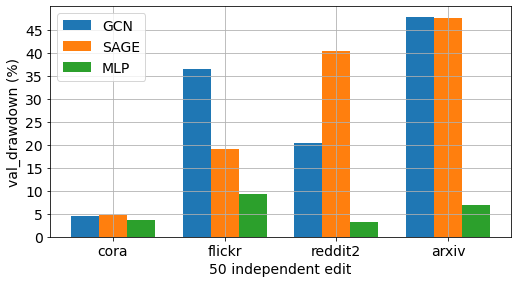

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
step_size = 1. / num_datasets 
X = np.arange(num_datasets)

title_mapping = {'ind_edit': '50 independent edit', 'seq_edit': '50 sequential edit', 'batch_edit': 'batch edit with batch size 50'}
for i in range(num_datasets - 1):
    ax.bar(X + step_size * i, gathered_data[i], width = step_size)

ax.set_xticks(X + step_size)
ax.set_xticklabels(datasets)
ax.set_yticks(np.arange(0., 50., 5.))
ax.set_ylabel(f'{metric} (%)')
ax.set_xlabel(f'{title_mapping[edit_way]}')
ax.grid()
ax.legend(models)
